In [256]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [257]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [258]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [259]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [260]:



df = getQuotes(frameM30, 2023, 8, 1)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1690828200,1.10258,1.10293,1.10176,1.10179,2532,8,0
1,1690830000,1.10180,1.10199,1.10107,1.10114,1748,8,0
2,1690831800,1.10114,1.10127,1.10036,1.10065,1719,8,0
3,1690833600,1.10065,1.10110,1.10044,1.10086,1311,8,0
4,1690835400,1.10086,1.10104,1.10037,1.10044,1157,8,0
...,...,...,...,...,...,...,...,...
918,1692999000,1.08103,1.08122,1.08048,1.08067,1928,8,0
919,1693000800,1.08067,1.08105,1.08057,1.08091,1801,8,0
920,1693002600,1.08092,1.08103,1.07992,1.08026,1462,8,0
921,1693004400,1.08025,1.08029,1.07919,1.07920,932,8,0


In [261]:


multiplier = 2
atrLookup = 20



def calculateSuperTrendIndicator(df, multiplier = 2, atrLookup = 10):
    supertrend= ta.supertrend(df['high'], df['low'], df['close'], length=atrLookup, multiplier=multiplier)
    df['supertrend'] = supertrend[f'SUPERT_{atrLookup}_{float(multiplier)}']
    return df





In [262]:

df = calculateSuperTrendIndicator(df, multiplier, atrLookup)

df = df.dropna()

# Because first entry of super trend is 0, due to which the graph value does not appear correct.

df = df[5:]

df



,time,open,high,low,close,tick_volume,spread,real_volume,supertrend
24,1690871400,1.09870,1.09874,1.09838,1.09853,853,8,0,1.097651
25,1690873200,1.09853,1.09864,1.09816,1.09847,743,8,0,1.097651
26,1690875000,1.09847,1.09906,1.09821,1.09898,1824,8,0,1.097651
27,1690876800,1.09898,1.09935,1.09862,1.09926,1386,8,0,1.097928
28,1690878600,1.09926,1.09987,1.09892,1.09985,1637,8,0,1.098283
...,...,...,...,...,...,...,...,...,...
918,1692999000,1.08103,1.08122,1.08048,1.08067,1928,8,0,1.078608
919,1693000800,1.08067,1.08105,1.08057,1.08091,1801,8,0,1.078632
920,1693002600,1.08092,1.08103,1.07992,1.08026,1462,8,0,1.078632
921,1693004400,1.08025,1.08029,1.07919,1.07920,932,8,0,1.078632


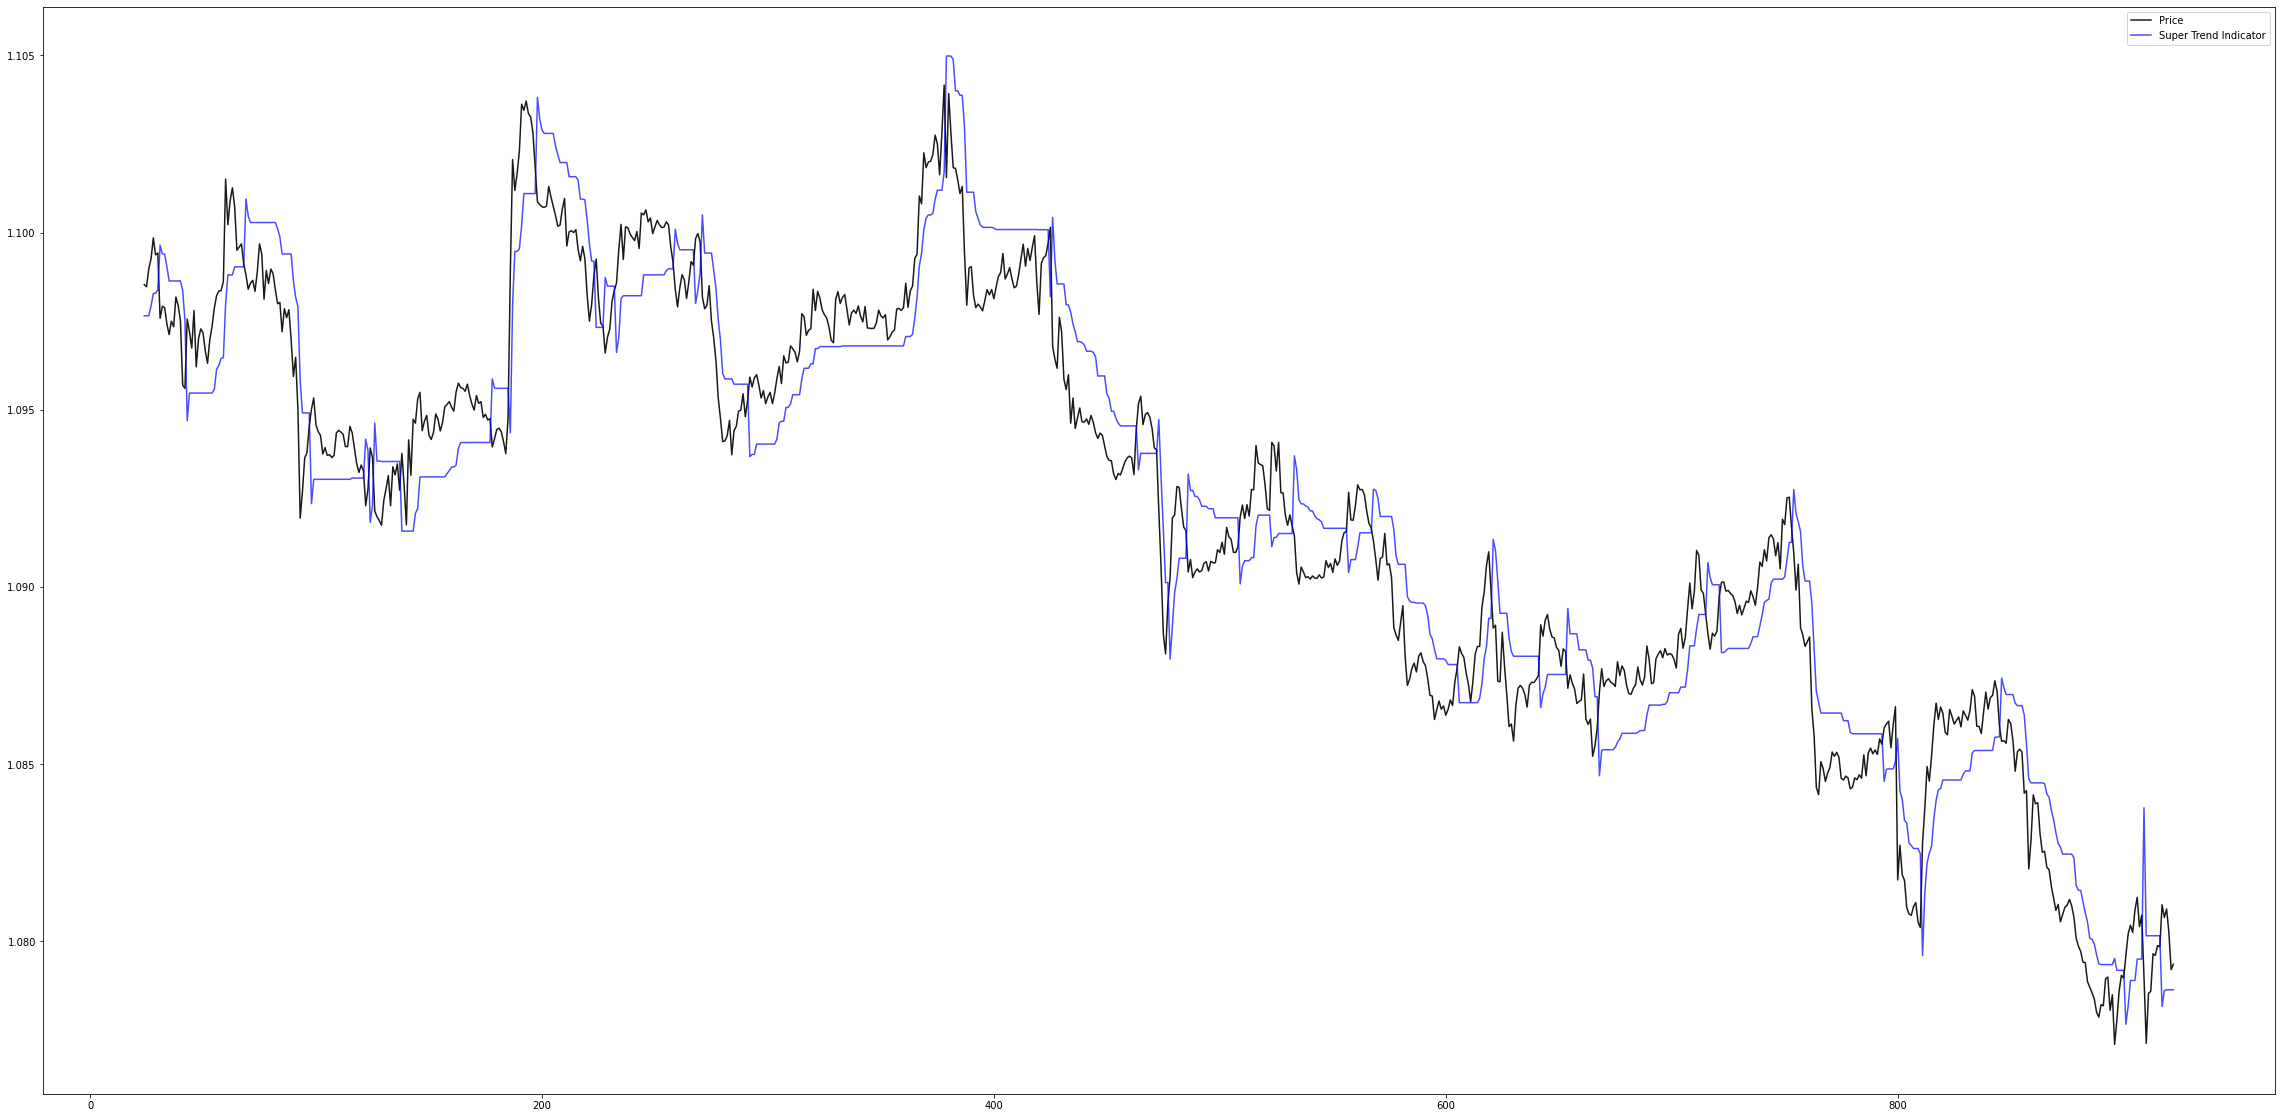

In [263]:


## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='black', alpha=0.9)

## Plotting the Super Trend Indicator
plt.plot(df['supertrend'], label='Super Trend Indicator', c='blue', alpha=0.7)

# Showing the plot
plt.legend()
plt.show()
     




## Important Note

- We can make use of EMA Crossover along with the given below strategy to confirm BUY / SELL Signals.


In [264]:






buyIndices = []
sellIndices = []
buys = []
sells = []
openPosition = None
targetPrice = None
pctRise = 0.01


for i in range(len(df)):
    if (i > 0) and (openPosition is None) and (df.iloc[i]['close'] > df.iloc[i]['supertrend']) and (df.iloc[i - 1]['close'] < df.iloc[i - 1]['supertrend']):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
        targetPrice = df.iloc[i]['close'] + (pctRise * df.iloc[i]['close'])
    elif (i > 0) and (openPosition) and (
        (
            (df.iloc[i]['close'] < df.iloc[i]['supertrend']) and (df.iloc[i - 1]['close'] > df.iloc[i - 1]['supertrend'])
        ) or (
            (targetPrice) and (df.iloc[i]['close'] >= targetPrice)
        )
    ):
        openPosition = None
        targetPrice = None
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])










In [265]:


print(buys)
print(sells)



[1.09756, 1.0950199999999999, 1.09392, 1.09377, 1.09887, 1.09925, 1.0985800000000001, 1.09983, 1.09592, 1.10015, 1.09517, 1.09029, 1.0919699999999999, 1.09267, 1.0883099999999999, 1.08893, 1.08704, 1.09013, 1.08602, 1.08279, 1.07961, 1.08103]
[1.0988, 1.09229, 1.09214, 1.09395, 1.10087, 1.0966, 1.0984, 1.09818, 1.10155, 1.09679, 1.09215, 1.09042, 1.09143, 1.09129, 1.08884, 1.08714, 1.08868, 1.09096, 1.08173, 1.08564, 1.0789900000000001]


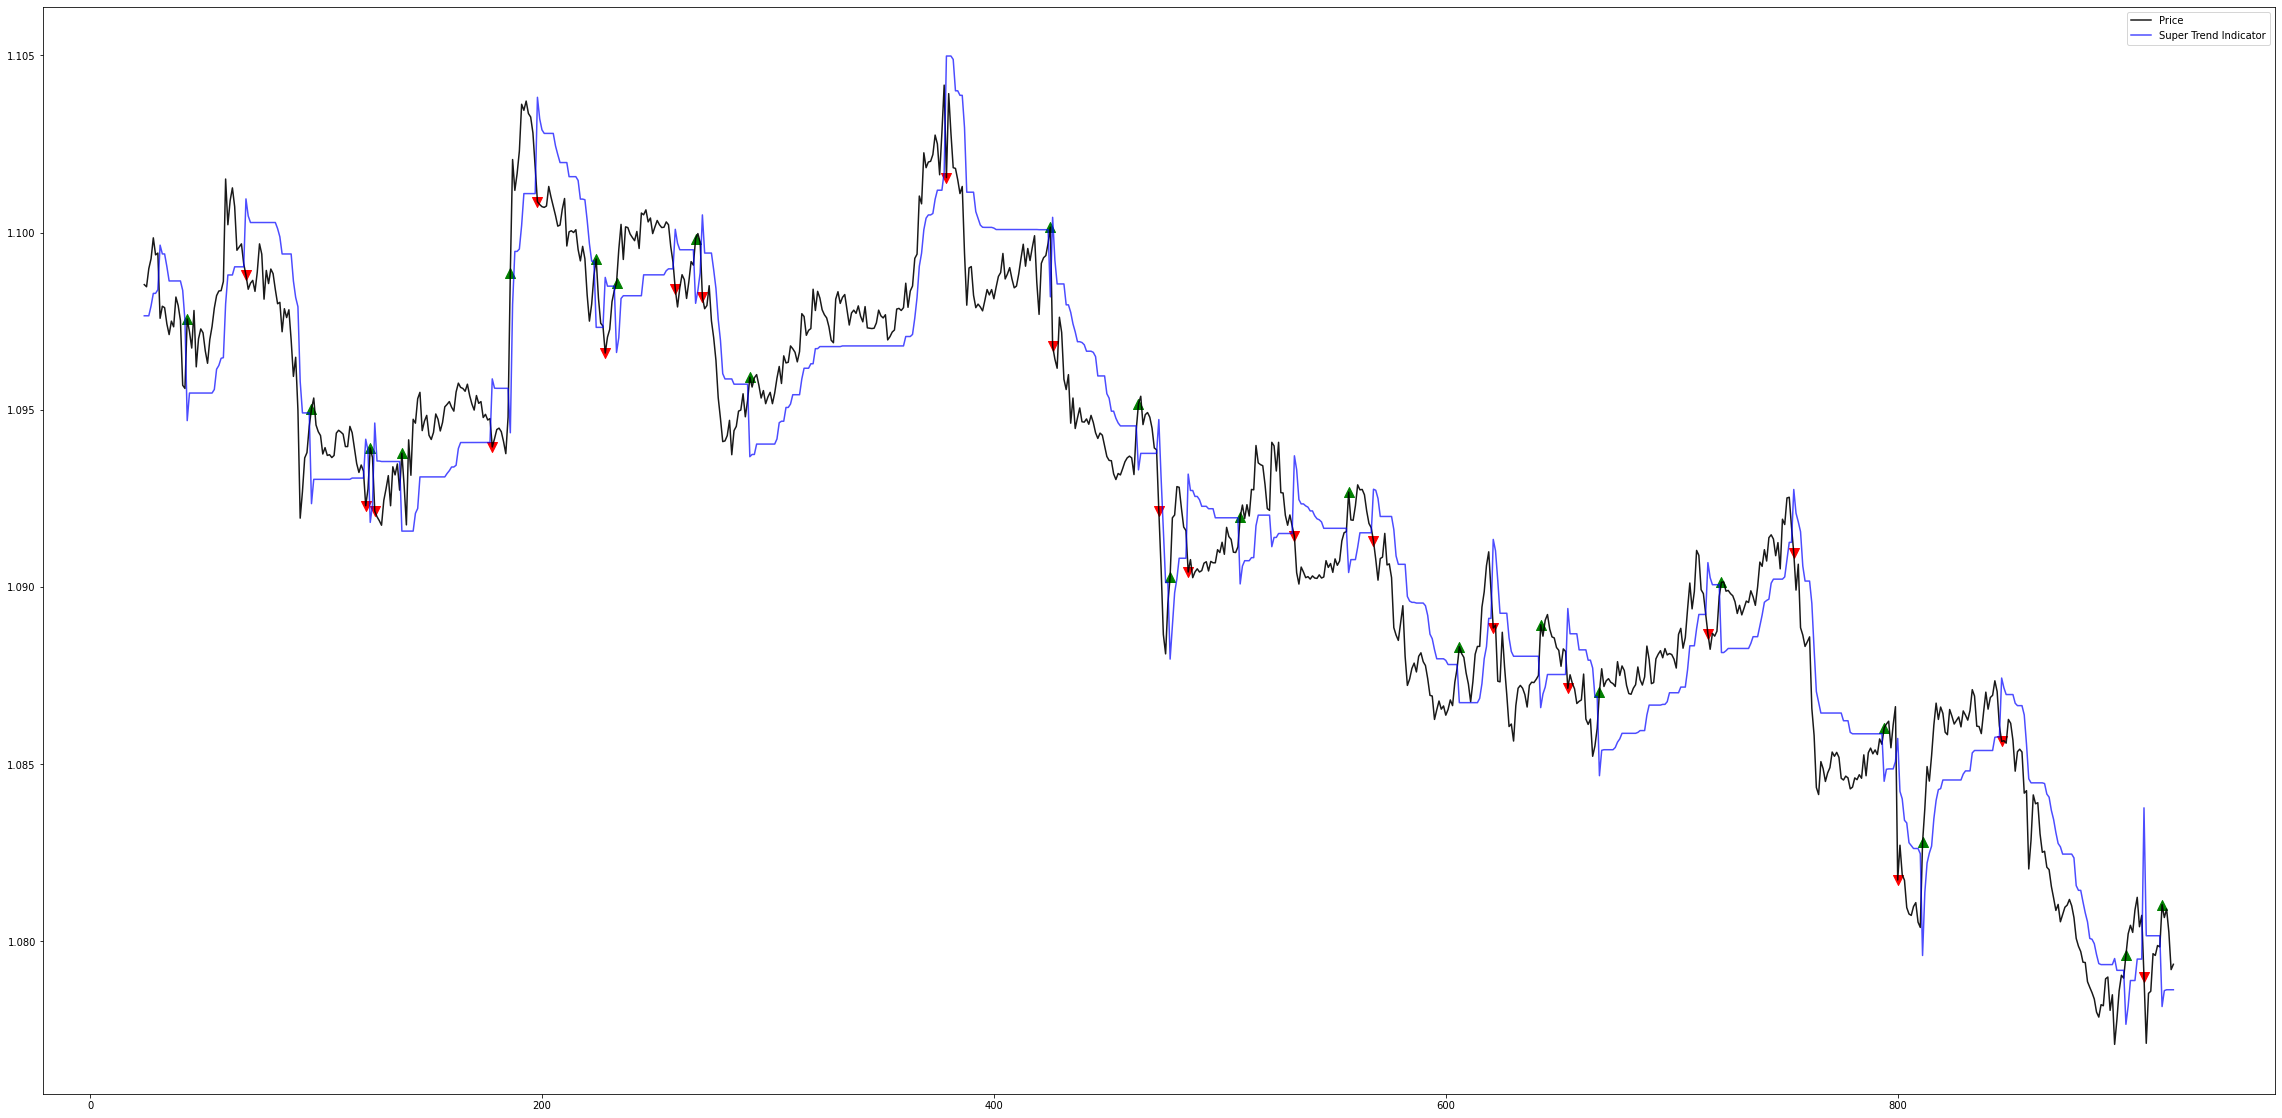

In [266]:











## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='black', alpha=0.9)

## Plotting the Super Trend Indicator
plt.plot(df['supertrend'], label='Super Trend Indicator', c='blue', alpha=0.7)

plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()














In [267]:






# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None
maximumPercentageWin = None
maximumPercentageLoss = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]
    maximumValue = max(sells[i], buys[i])
    netResult = netResult - (0.002 * maximumValue);
    percentageWinOrLoss = (netResult / maximumValue) * 100
    message = None

    if netResult < 0:
        loseTrades += 1
        message = f'Lost {percentageWinOrLoss}'
    else:
        winTrades += 1
        message = f'Win {percentageWinOrLoss}'

    if not maximumWin or netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose or netResult < maximumLose:
        maximumLose = netResult

    if not maximumPercentageWin or percentageWinOrLoss > maximumPercentageWin:
        maximumPercentageWin = percentageWinOrLoss

    if not maximumPercentageLoss or percentageWinOrLoss < maximumPercentageLoss:
        maximumPercentageLoss = percentageWinOrLoss

    totalPL = totalPL + netResult
    print(message)

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')
print(f'Maximum Percentage Win = {maximumPercentageWin}')
print(f'MaximumPercentage Loss = {maximumPercentageLoss}')






Lost -0.08714961776484276
Lost -0.4493105148764314
Lost -0.362717566183989
Lost -0.18354586589880076
Lost -0.018325506190558234
Lost -0.4410734591767152
Lost -0.2163847876349532
Lost -0.350023185401394
Win 0.31109799827515994
Lost -0.5054128982411518
Lost -0.47575627528146525
Lost -0.18807798829809033
Lost -0.2494519080194497
Lost -0.3262961369855434
Lost -0.1513243451746683
Lost -0.36438154885988616
Lost -0.04935885659697195
Lost -0.12392021705654778
Lost -0.5950203495331491
Win 0.06251796175527978
Lost -0.25742814534876884
Total P & L = -0.05488165999999964
Win Trades = 2
Lose Trades = 19
Maximum Win = 0.003426900000000024
Maximum Lose = -0.006462039999999905
Maximum Percentage Win = 0.31109799827515994
MaximumPercentage Loss = -0.5950203495331491
